In [1]:
from keras.layers import SimpleRNN,LSTM, Embedding, Dense, Input
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# **Preparing Data**

In [2]:
from keras.datasets import imdb
max_features = 10000 # no of words to be considered as features
max_len= 500 # cut the texts after these many no of words
(train_data,train_lab),(test_data,test_lab) = imdb.load_data(num_words=max_features)


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
x_train = pad_sequences(train_data,maxlen=max_len,padding='post')
x_test = pad_sequences(test_data,maxlen=max_len,padding='post')

In [4]:
vocab = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


**pre-processing the embeddings**

In [5]:
def get_glove_model(glove_dir):
  embeddings_index = {}
  f = open(glove_dir)

  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  print('Total %s word vectors: '%len(embeddings_index))
  return embeddings_index

**Building Embedding Matrix**

In [6]:
def embedding_matrix(tk_vocab,glove_vocab,embed_size):
  matrix = np.zeros((len(tk_vocab)+1,embed_size))   #tokenizer vocab starts from index 1
                                                    #len(vocab)+1 --->>  index 0 will be stored for paddings
  c = 0
  for word,i in tk_vocab.items():
    embedding_vector = glove_vocab.get(word)
    if embedding_vector is not None:
      matrix[i] = embedding_vector
      c+=1
  print('Found {} embeddings '.format(c))
  print('Missed {} embeddings '.format(len(tk_vocab) - c))

  return matrix

In [7]:
glove_vocab = get_glove_model('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/glove.6B.100d.txt')

Total 400000 word vectors: 


In [8]:
embedding_matrix =  embedding_matrix(vocab,glove_vocab,100)

Found 60150 embeddings 
Missed 28434 embeddings 


# **Network Building**

In [11]:
input = Input(shape=(max_len,))
embeddings = Embedding(input_dim=len(vocab)+1,
                            output_dim=100,
                            input_length=max_len,
                            weights=[embedding_matrix],
                            trainable=False)(input)
output = SimpleRNN(32,return_sequences=True)(embeddings)
output = SimpleRNN(32)(output)
output = Dense(1,activation='sigmoid')(output)

model = Model(inputs=input,outputs=output)
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.fit(x_train,train_lab,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 67s 208ms/step - loss: 0.7002 - acc: 0.5013 - val_loss: 0.6964 - val_acc: 0.5064
Epoch 2/10
313/313 [==============================] - 65s 207ms/step - loss: 0.6931 - acc: 0.5082 - val_loss: 0.6951 - val_acc: 0.5056
Epoch 3/10
313/313 [==============================] - 65s 208ms/step - loss: 0.6904 - acc: 0.5024 - val_loss: 0.6974 - val_acc: 0.4990
Epoch 4/10
313/313 [==============================] - 65s 208ms/step - loss: 0.6873 - acc: 0.5218 - val_loss: 0.6965 - val_acc: 0.5062
Epoch 5/10
313/313 [==============================] - 65s 209ms/step - loss: 0.6836 - acc: 0.5167 - val_loss: 0.6978 - val_acc: 0.5072
Epoch 6/10
313/313 [==============================] - 65s 206ms/step - loss: 0.6823 - acc: 0.5227 - val_loss: 0.7033 - val_acc: 0.4966
Epoch 7/10
313/313 [==============================] - 65s 207ms/step - loss: 0.6776 - acc: 0.5307 - val_loss: 0.7079 - val_acc: 0.4928
Epoch 8/10
313/313 [==============================] - 6

# **Model Evaluation**

In [12]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [13]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

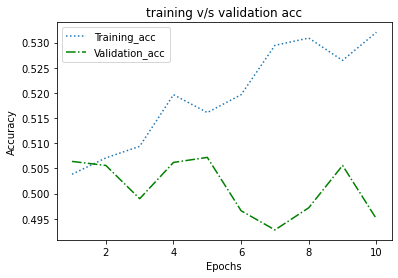

In [14]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

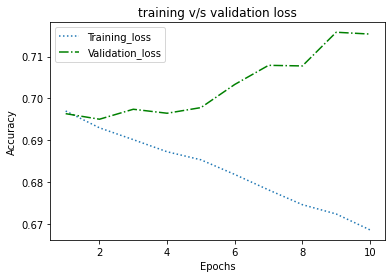

In [15]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

# **LSTM**

In [18]:
from keras.layers import LSTM, Bidirectional,TimeDistributed

**Time Distributed**

In [ ]:
#It allows to apply same layer to every time step during LSTM/GRU Cell unrolling.

In [21]:
input = Input(shape=(max_len,))
embeddings = Embedding(input_dim=len(vocab)+1,
                            output_dim=100,
                            input_length=max_len,
                            weights=[embedding_matrix],
                            trainable=False)(input)
output = LSTM(64,return_sequences=True)(embeddings)
output = TimeDistributed(Dense(1,activation='sigmoid'))(output)

model2 = Model(inputs=input,outputs=output)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model2.fit(x_train,train_lab,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 101s 316ms/step - loss: 0.6944 - acc: 0.5029 - val_loss: 0.6933 - val_acc: 0.5135
Epoch 2/10
313/313 [==============================] - 100s 321ms/step - loss: 0.6893 - acc: 0.5387 - val_loss: 0.6878 - val_acc: 0.5322
Epoch 3/10
313/313 [==============================] - 99s 317ms/step - loss: 0.6842 - acc: 0.5541 - val_loss: 0.6943 - val_acc: 0.5145
Epoch 4/10
313/313 [==============================] - 99s 318ms/step - loss: 0.6753 - acc: 0.5862 - val_loss: 0.6591 - val_acc: 0.6158
Epoch 5/10
313/313 [==============================] - 100s 318ms/step - loss: 0.6678 - acc: 0.6002 - val_loss: 0.6515 - val_acc: 0.6336
Epoch 6/10
313/313 [==============================] - 99s 317ms/step - loss: 0.6665 - acc: 0.6018 - val_loss: 0.6492 - val_acc: 0.6487
Epoch 7/10
313/313 [==============================] - 100s 318ms/step - loss: 0.6657 - acc: 0.6000 - val_loss: 0.6827 - val_acc: 0.5120
Epoch 8/10
313/313 [==============================]

# **Bidirectional LSTM**

In [24]:
input = Input(shape=(max_len,))
embeddings = Embedding(input_dim=len(vocab)+1,
                            output_dim=100,
                            input_length=max_len,
                            weights=[embedding_matrix],
                            trainable=False)(input)
output = Bidirectional(LSTM(64,return_sequences=True))(embeddings)
output = TimeDistributed(Dense(1,activation='sigmoid'))(output)

model3 = Model(inputs=input,outputs=output)
model3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model3.fit(x_train,train_lab,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 195s 615ms/step - loss: 0.6963 - acc: 0.5040 - val_loss: 0.6963 - val_acc: 0.5060
Epoch 2/10
313/313 [==============================] - 191s 610ms/step - loss: 0.6871 - acc: 0.5399 - val_loss: 0.6820 - val_acc: 0.5554
Epoch 3/10
313/313 [==============================] - 191s 611ms/step - loss: 0.6835 - acc: 0.5521 - val_loss: 0.6832 - val_acc: 0.5459
Epoch 4/10
313/313 [==============================] - 191s 610ms/step - loss: 0.6755 - acc: 0.5696 - val_loss: 0.6762 - val_acc: 0.5729
Epoch 5/10
313/313 [==============================] - 191s 609ms/step - loss: 0.6676 - acc: 0.5908 - val_loss: 0.6448 - val_acc: 0.6350
Epoch 6/10
313/313 [==============================] - 190s 608ms/step - loss: 0.6520 - acc: 0.6191 - val_loss: 0.6789 - val_acc: 0.5599
Epoch 7/10
313/313 [==============================] - 191s 610ms/step - loss: 0.6438 - acc: 0.6274 - val_loss: 0.6430 - val_acc: 0.6206
Epoch 8/10
313/313 [============================

# **Model Evaluation**

In [29]:
dict_ = model3.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [30]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

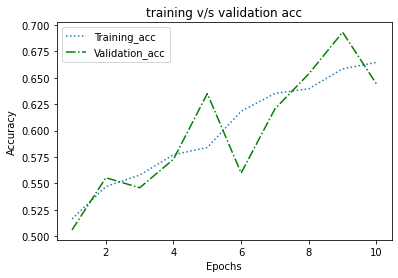

In [31]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

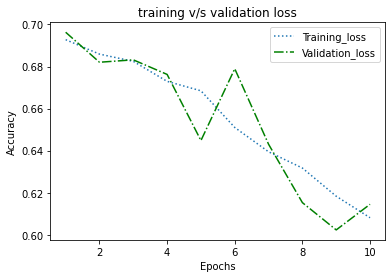

In [32]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()